# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list also record lat and lng
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
#lat_lngs = zip(cities_lat, cities_lng)
#city = ""
cities_lat = []
cities_lng = []
cities_temp = []
cities_hum = []
cities_cld = []
cities_wnd = []

index = 1
print("""
Beginning Data Retrieval     
-----------------------------
""")
for city in cities[:]:
    # Build query URL
    query_url = url+"appid="+api_key + "&q="+city
    weather_json = requests.get(query_url+'&units=imperial').json()
    # Check if city is found in weather api DB
    if(weather_json['cod'] != 200):
        print("Skipping city not found in weather map API...")
        cities.remove(city)
    else:
        print(f"Processing Record {index} of Set {(index//50)+1} | {city}")
        # append data to list to be created into DF
        cities_lat.append(weather_json['coord']['lat'])
        cities_lng.append(weather_json['coord']['lon'])
        cities_temp.append(weather_json['main']['temp_max'])
        cities_hum.append(weather_json['main']['humidity'])
        cities_cld.append(weather_json['clouds']['all'])
        cities_wnd.append(weather_json['wind']['speed'])
        index += 1
    #if(index > 11):
    #    break


Beginning Data Retrieval     
-----------------------------

Skipping city not found in weather map API...
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | coquimbo
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | barrow
Processing Record 5 of Set 1 | abasolo
Processing Record 6 of Set 1 | vestmannaeyjar
Processing Record 7 of Set 1 | bodden town
Processing Record 8 of Set 1 | carmaux
Processing Record 9 of Set 1 | smithers
Processing Record 10 of Set 1 | hai duong
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | butaritari
Processing Record 13 of Set 1 | shelabolikha
Processing Record 14 of Set 1 | maningrida
Processing Record 15 of Set 1 | blora
Processing Record 16 of Set 1 | kidal
Processing Record 17 of Set 1 | goderich
Processing Record 18 of Set 1 | bandarbeyla
Processing Record 19 of Set 1 | siparia
Processing Record 20 of Set 1 | puerto ayora
Processing Record 21 of Set 1 | katiola
Skipping city not found in

Processing Record 170 of Set 4 | katsuura
Processing Record 171 of Set 4 | hobyo
Processing Record 172 of Set 4 | areosa
Processing Record 173 of Set 4 | sao joao da barra
Processing Record 174 of Set 4 | pangnirtung
Processing Record 175 of Set 4 | notre-dame-du-lac
Processing Record 176 of Set 4 | saskylakh
Processing Record 177 of Set 4 | huangnihe
Processing Record 178 of Set 4 | cayenne
Processing Record 179 of Set 4 | machala
Processing Record 180 of Set 4 | mount gambier
Processing Record 181 of Set 4 | gat
Processing Record 182 of Set 4 | iqaluit
Processing Record 183 of Set 4 | necochea
Skipping city not found in weather map API...
Processing Record 184 of Set 4 | turukhansk
Processing Record 185 of Set 4 | san roque
Processing Record 186 of Set 4 | port hardy
Processing Record 187 of Set 4 | kenai
Processing Record 188 of Set 4 | san carlos de bariloche
Skipping city not found in weather map API...
Processing Record 189 of Set 4 | quelimane
Processing Record 190 of Set 4 | ha

Processing Record 338 of Set 7 | koungheul
Processing Record 339 of Set 7 | vostok
Processing Record 340 of Set 7 | tingi
Processing Record 341 of Set 7 | longyearbyen
Processing Record 342 of Set 7 | ostrovnoy
Processing Record 343 of Set 7 | chibombo
Skipping city not found in weather map API...
Processing Record 344 of Set 7 | jalu
Processing Record 345 of Set 7 | potosi
Processing Record 346 of Set 7 | labuan
Processing Record 347 of Set 7 | san policarpo
Processing Record 348 of Set 7 | nova londrina
Processing Record 349 of Set 7 | talara
Processing Record 350 of Set 8 | bambous virieux
Skipping city not found in weather map API...
Processing Record 351 of Set 8 | mumford
Processing Record 352 of Set 8 | thunder bay
Processing Record 353 of Set 8 | banda aceh
Processing Record 354 of Set 8 | camacupa
Processing Record 355 of Set 8 | beloha
Skipping city not found in weather map API...
Processing Record 356 of Set 8 | port blair
Processing Record 357 of Set 8 | benjamin aceval
Pro

Processing Record 509 of Set 11 | husavik
Skipping city not found in weather map API...
Processing Record 510 of Set 11 | long xuyen
Processing Record 511 of Set 11 | shelburne
Processing Record 512 of Set 11 | taksimo
Processing Record 513 of Set 11 | te anau
Processing Record 514 of Set 11 | stamford
Processing Record 515 of Set 11 | luganville
Processing Record 516 of Set 11 | eyl
Processing Record 517 of Set 11 | laytown
Processing Record 518 of Set 11 | allende
Processing Record 519 of Set 11 | bereda
Processing Record 520 of Set 11 | adavere
Processing Record 521 of Set 11 | maniitsoq
Processing Record 522 of Set 11 | bantogon
Processing Record 523 of Set 11 | yulara
Processing Record 524 of Set 11 | apulia
Processing Record 525 of Set 11 | vardo
Processing Record 526 of Set 11 | tandil
Processing Record 527 of Set 11 | isilkul
Processing Record 528 of Set 11 | kaeo
Processing Record 529 of Set 11 | saint-denis
Processing Record 530 of Set 11 | tazovskiy
Processing Record 531 of 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_data_df = pd.DataFrame({"City_Name" : cities,
                               "Lattitude" : cities_lat,
                               "Longitude": cities_lng,
                               "Temperature(F)" : cities_temp,
                               "Humidity": cities_hum,
                               "Cloudiness": cities_cld,
                               "Windiness(mph)": cities_wnd})
cities_data_df['City_Name'] = cities_data_df['City_Name'].str.title()
cities_data_df.to_csv(output_data_file, index=False)
cities_data_df.head()
#cities_data_df.dtypes

,City_Name,Lattitude,Longitude,Temperature(F),Humidity,Cloudiness,Windiness(mph)
0,Thompson,55.74,-97.86,48.20,76,20,10.29
1,Coquimbo,-29.95,-71.34,50.00,87,0,4.16
2,Rikitea,-23.12,-134.97,69.70,100,100,30.89
3,Barrow,-38.31,-60.23,49.09,76,80,11.54
4,Abasolo,20.45,-101.53,64.40,82,75,2.37


In [6]:
#function to setup color for legend
def tempColor(temp):
    if(temp >= 80):
        return '#8B0000'
    elif(temp >= 50):
        return '#FFD700'
    else:
        return '#87CEEB'
timestamp = time.strftime("%m-%d-%y")
timestamp

'09-02-18'

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

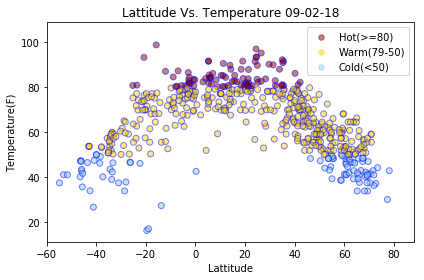

In [8]:
fig, ax = plt.subplots()
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Temperature(F)']

colors = [tempColor(temp) for temp in cities_data_df['Temperature(F)']]
plt.scatter(x_axis, y_axis, c=colors, edgecolors='b', alpha=0.5, label="__no_legend__")

# Incorporate the other graph properties
plt.xlabel("Lattitude")
plt.ylabel("Temperature(F)")
plt.title(f"Lattitude Vs. Temperature {timestamp}")

temp_scale = [80,50,40]
label=['Hot(>=80)', 'Warm(79-50)', 'Cold(<50)']
# Create a legend
plt.scatter([], [], c=tempColor(temp_scale[0]), alpha=0.5, s=30,
                label=label[0])
plt.scatter([], [], c=tempColor(temp_scale[1]), alpha=0.5, s=30,
                label=label[1])
plt.scatter([], [], c=tempColor(temp_scale[2]), alpha=0.5, s=30,
                label=label[2])
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, title='Temp Scale')
plt.legend(loc='best')

#ax.text(0, y_axis.max()+5, f"Data samples taken on: {timestamp}", style='normal', color='#000000',
        #bbox={'facecolor':'#FFD700', 'alpha':0.3, 'pad':3})

plt.ylim(y_axis.min()-5,y_axis.max()+10)
plt.xlim(x_axis.min()-5,x_axis.max()+10)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_temp.png')

#### Latitude vs. Humidity Plot

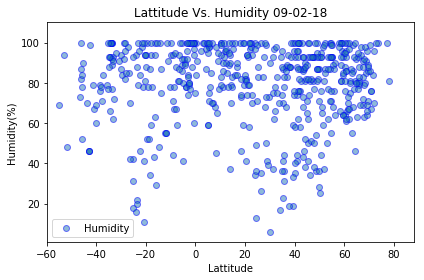

In [11]:
fig, ax = plt.subplots()
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Humidity']
plt.scatter(x_axis, y_axis, edgecolors='b', alpha=0.5)
plt.legend(loc="best")
plt.xlabel("Lattitude")
plt.ylabel("Humidity(%)")
plt.title(f"Lattitude Vs. Humidity {timestamp}")
#ax.text(10, y_axis.max()+4, f"Data samples taken on: {timestamp}", style='normal', color='#000000',
#        bbox={'facecolor':'#FFD700', 'alpha':0.3, 'pad':3})
plt.ylim(y_axis.min()-5,y_axis.max()+10)
plt.xlim(x_axis.min()-5,x_axis.max()+10)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_hum.png')

#### Latitude vs. Cloudiness Plot

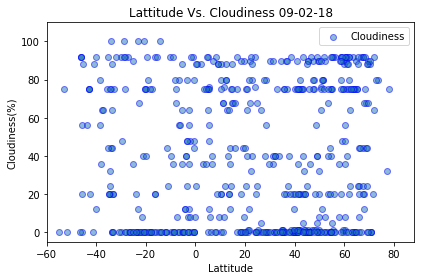

In [13]:
fig, ax = plt.subplots()
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Cloudiness']
plt.scatter(x_axis, y_axis, edgecolors='b', alpha=0.5)
plt.legend(loc="best")
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"Lattitude Vs. Cloudiness {timestamp}")
#ax.text(0, y_axis.max()+15, f"Data samples taken on: {timestamp}", style='normal', color='#000000',
#        bbox={'facecolor':'#FFD700', 'alpha':0.3, 'pad':3})
plt.ylim(y_axis.min()-5,y_axis.max()+10)
plt.xlim(x_axis.min()-5,x_axis.max()+10)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_cld.png')

#### Latitude vs. Wind Speed Plot

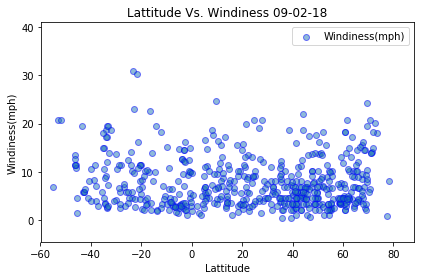

In [15]:
fig, ax = plt.subplots()
x_axis = cities_data_df['Lattitude']
y_axis = cities_data_df['Windiness(mph)']
plt.scatter(x_axis, y_axis, edgecolors='b', alpha=0.5)
plt.legend(loc="best")
plt.xlabel("Lattitude")
plt.ylabel("Windiness(mph)")
plt.title(f"Lattitude Vs. Windiness {timestamp}")
#ax.text(0, y_axis.max()+5, f"Data samples taken on: {timestamp}", style='normal', color='#000000',
#        bbox={'facecolor':'#FFD700', 'alpha':0.3, 'pad':3})
plt.ylim(y_axis.min()-5,y_axis.max()+10)
plt.xlim(x_axis.min()-5,x_axis.max()+10)
plt.tight_layout()
# Save Figure
plt.savefig('output_data/lat_vs_wnd.png')